---

<center>
    <h1>
On how to get a glimpse of the fourteenth dimension, and the Perron-Frobenius Theorem
    </h1>
</center>

---

<h2> Part I. Principal Component Analysis</h2>

<p>
Having a good visual representation in mathematics is not always an easy task, especially when it comes to work in high dimensional spaces ($n > 3$) while at the same time, datasets are getting larger and larger. In this kind of situation, it happens that the PCA is a strong ally. The term PCA stands for Principal Component Analysis, and - roughly speaking - consists in smashing a very high dimensional clouds of points into a nice, well-chosen, 2D (or sometimes 3D) space that is prone to visualisation. In the mathematical jargon, one would say that it consists in diagonalizing the matrix of correlation, but we will get to this later.
</p>

<p>
The goal of this first section is thus to walk through the different steps of the PCA, so without further ado, let us start !
</p>

In [2]:
# First, one must not forget about the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We're almost finished with the prerequisites, nonetheless we are missing the most important part of the process : the data set.
During this project we will be working on the given data set "deca.txt" in which is confined the results of 42 athletes in 14 different disciplines, all that in 2 different competitions. In the following we shall not distinguish from which competition each athlete is.

In [7]:
# Importing the data
data = pd.read_csv('deca.txt', sep="\t")

# Cleaning the data by removing non-text and not useful columns
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# Glimpse on the data
print(my_data.head())

          100m  Long.jump  Shot.put  High.jump   400m  110m.hurdle  Discus  \
SEBRLE   11.04       7.58     14.83       2.07  49.81        14.69   43.75   
CLAY     10.76       7.40     14.26       1.86  49.37        14.05   50.72   
KARPOV   11.02       7.30     14.77       2.04  48.37        14.09   48.95   
BERNARD  11.02       7.23     14.25       1.92  48.93        14.99   40.87   
YURKOV   11.34       7.09     15.19       2.10  50.42        15.31   46.26   

         Pole.vault  Javeline  1500m  
SEBRLE         5.02     63.19  291.7  
CLAY           4.92     60.15  301.5  
KARPOV         4.92     50.31  300.2  
BERNARD        5.32     62.77  280.1  
YURKOV         4.72     63.44  276.4  


Of course, let us now store the numbers in a matrix :

In [8]:
XX = np.array(my_data.values)

At this point, one might be genuinely tempted to move forward. However, at this stage the data is not normalized. Namely, take this amazing example from [this video (26m17s - 27m29s)](https://youtu.be/uV5hmpzmWsU?t=1576) which expose the major issue when trying to put in evidence the correlation between the size, and the mass of an individual : Take the size in centimeters and the weight in kilograms, then the cloud of points will be squished along the "weight" axis. Conversely, take the size in centimeters and the weight in quintals, this time the cloud will be streched along the "size" axis. 

Let us then recall quickly that if $X^{(m)} = (x_1^{(m)}, \dots, x_n^{(m)})$ is our data set representing the variable $m$, call 

$$\overline{X}^{(m)} \triangleq \frac{1}{n} \sum_{i=1}^{n} x_i^{(m)} \quad \text{as well as} \quad \sigma_{X^{(m)}}^2 \triangleq 
\frac{1}{n}\sum_{i=1}^{n} \left( x_i^{(m)} - \overline{X}^{(m)}\right)$$

Finally define the data set :

$$X \triangleq \frac{XX - \overline{XX}}{\sigma_{XX}}$$

This set is now of mean $0$ and of standard deviation $1$ which allows us to continue from here. In the following, we define a bunch of functions whose goal is to normalize the data for a given array.

**Warning : I use the convention $X_{i, j}$ = individual i evaluated for variable j**

In [31]:
def get_mean(M):
    return np.sum(M) / len(M)

def get_std(M):
    mean = get_mean(M)
    num = np.sum([(x-mean)**2 for x in M])
    std = num / (len(M))
    return np.sqrt(std)

def normalize_data(M):
    rows, cols = M.shape
    new_mat = np.zeros((rows, cols))
    tmp = np.zeros(rows)
    for col in range(cols):
        mean = get_mean(M[:, col])
        sigma = get_std(M[:, col])
        tmp = np.array([])
        for e in M[:, col]:
            tmp = np.append(tmp, (e - mean) / sigma)
        new_mat[:, col] = tmp
    return new_mat

X = normalize_data(XX)

Continue ?

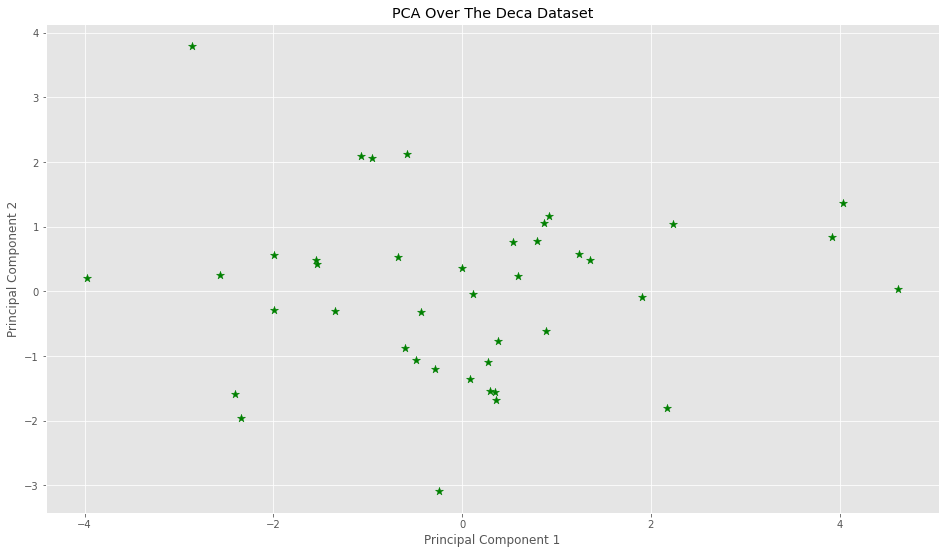

In [33]:
# SVD of the normalized data
U, S, VT = np.linalg.svd(X)

# Only keep the two vectors (associated to the two largest principal components)
new_directions = VT.T[:, :2]

# Project the cloud of points on the new directions
X_pca = X.dot(new_directions)

# fetches x and y coordinate of each point X_i
xs = [X_pca[i, 0] for i in range(len(X_pca))]
ys = [X_pca[i, 1] for i in range(len(X_pca))]

# display PCA using scatter plot
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16,9)

fig, ax = plt.subplots()

ax.scatter(xs, ys, c='g', marker='*', s=70)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.title("PCA Over The Deca Dataset")
plt.show()

<h2>Interpreting the data ?</h2>

<h2>Part II. Perron Frobenius in population dynamics</h2>

Lorsque l'on s'intéresse à l'évolution d'une population dans le temps, il peut être intéressant dans un premier temps d'approximer le modèle par un processus itératif $X^{n+1} = MX^n$. Les itérés de la matrice $M$ - fortement dépendante des conditions du problème initial - renferment de précieuses informations quand au comportement asymptotique du système : Évolution temporelle et spatiale de la population ? La population tend-elle vers un état stable ou non ? Quelle sera la proportion de chaque individu sur le long terme ?

Toutes ces questions trouverons leur réponse dans la suite de ce projet.

$$\det\left( \lambda I_n - \mathcal L \right) \ = \ \det
\begin{bmatrix}
\lambda - f_1 & -f_2 & -f_3 & \dots & -f_n \\
-s_1 & \lambda & 0 & \dots & 0 \\
0 & -s_2 & \lambda & \dots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \dots & \lambda & 0 \\
0 & 0 & \dots & s_{n-1} & \lambda 
\end{bmatrix}$$

One develops the determinant with respect to the first column

$$\det\left( \lambda I_n - \mathcal L \right) \ = \ \left( \lambda - f_1 \right) \det 
\begin{bmatrix}
\lambda & 0 & 0 & \dots & 0 \\
-s_2 & \lambda & 0 & \dots & 0 \\
0 & -s_3 & \lambda & \dots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \dots & -s_{n-1} & \lambda
\end{bmatrix}
+ s_1 \det 
\begin{bmatrix}
-f_2 & -f_3 & -f_4 & \dots & -f_n \\
-s_2 & \lambda & 0 & \dots & 0 \\
0 & -s_3 & \lambda & \dots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \dots & -s_{n-1} & \lambda
\end{bmatrix}$$

$$ =(\lambda - f_1)\lambda^{n-1} + s_1 \left[ \right]$$